In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ift6758.data import get_data

In [2]:
df = pd.read_csv("../ift6758/data/preprocessed_data/preprocessed_game_data.csv")
df['is_goal'] = df['type'] == 'Goal'

C:\Users\dre\AppData\Local\Temp\ipykernel_81764\790624547.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../ift6758/data/preprocessed_data/preprocessed_game_data.csv")


In [3]:
df.columns

Index(['eventId', 'timeInPeriod', 'periodDescriptor_number',
       'homeTeamDefendingSide', 'xCoord', 'yCoord', 'eventOwnerTeamId',
       'shootingPlayerId', 'goalieInNetId', 'shotType', 'zoneCode', 'id',
       'gameDate', 'season', 'homeTeam_abbrev', 'homeTeam_score',
       'awayTeam_abbrev', 'awayTeam_score', 'awayTeam_id', 'homeTeam_id',
       'type', 'scoringPlayerId', 'is_goal'],
      dtype='object')

# Figure 3.1: most dangerous kind of shots ? most common type of shots ?
The most dangerous kind of shot seems to be the deflection (18% of chance of scoring). This makes sense because it's very hard for goalie to catch an imprevisible shot like this one.
It's also worth noting that the "tip-in" shot is very dangerous (16% chance of scoring), but it's also very difficult to make that shot. 
All the other shot types have less than 10% change of being goals, but are more frequent.

The wrist shot is the most common, and not the most dangerous one. However, it's the shot that produces the highest number of goals overall.

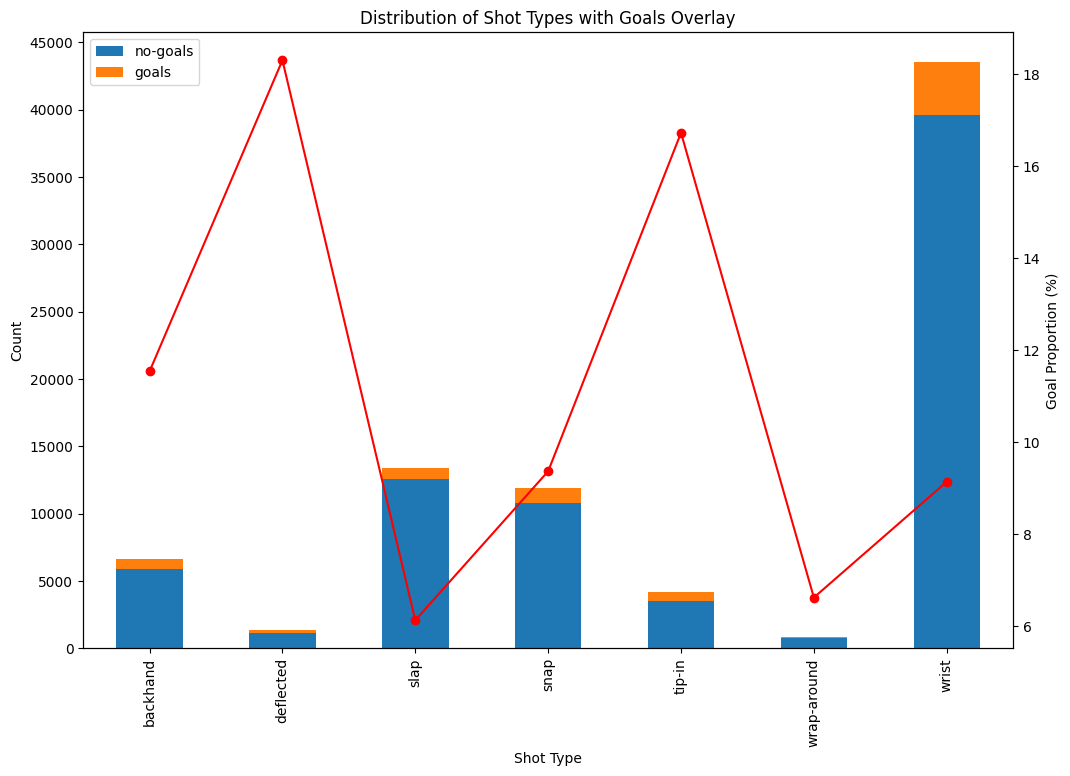

In [4]:
df_2017 = df[df['season'] == 20172018]

# Calculate the number of goals for each shot type
goal_counts = df_2017[df_2017['type'] == 'Goal']['shotType'].value_counts()
no_goal_counts = df_2017[df_2017['type'] == 'ShotOnGoal']['shotType'].value_counts()


# Overlay the number of goals over the number of shots
shot_type_distribution = pd.DataFrame({
    'no-goals': no_goal_counts,
    'goals': goal_counts
}).fillna(0)

# Calculate the proportion of goals per shot type
shot_type_distribution['goal_proportion'] = shot_type_distribution['goals'] / (shot_type_distribution['no-goals'] + shot_type_distribution['goals'])

# Plot the distribution of no-goals and goals
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the bar chart for no-goals and goals
shot_type_distribution[['no-goals', 'goals']].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Distribution of Shot Types with Goals Overlay')
ax1.set_xlabel('Shot Type')
ax1.set_ylabel('Count')
y_ticks_labels = range(0, max(shot_type_distribution['no-goals'] + shot_type_distribution['goals']) + 5000, 5000)
ax1.set_yticks(y_ticks_labels)

# Create a secondary y-axis for the goal proportion
ax2 = ax1.twinx()
shot_type_distribution['goal_proportion'] *= 100 
shot_type_distribution['goal_proportion'].plot(kind='line', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Goal Proportion (%)')

plt.show()

# Figure 3.2
- high chance of scoring from high distance: less shots are attempted, and the few that score are because of the abscence of the goalie in front of net
- noticeable shot count diminution between 2018-2019 and the 2 folowing seasons -> explanation: less game played because of covid
- the proportion of goals remains very stable per distance bins, which shows us that our bining every 10 feet seems to minimize variance accross data while showing enough information about data: for example, we see that there a few shots between 0 and 5 feet, while there's a lot between 5 and 10 feet
    -> porportions of goal diverge when the number of total shots are low (when the shot is further than 75 feet)
 -figure shows the raw number of shots, easily comprable by season, with proportions of goal on secondary y axis because the scale is completely different

In [5]:
df.columns

Index(['eventId', 'timeInPeriod', 'periodDescriptor_number',
       'homeTeamDefendingSide', 'xCoord', 'yCoord', 'eventOwnerTeamId',
       'shootingPlayerId', 'goalieInNetId', 'shotType', 'zoneCode', 'id',
       'gameDate', 'season', 'homeTeam_abbrev', 'homeTeam_score',
       'awayTeam_abbrev', 'awayTeam_score', 'awayTeam_id', 'homeTeam_id',
       'type', 'scoringPlayerId', 'is_goal'],
      dtype='object')

## distance calculation and sanity checks

In [6]:
# Calculate the distance from the goal (assuming the goal is at (-100, 0) or (100, 0))
left_goal_coords = (-100+11, 0)
right_goal_coords = (100-11, 0)

def min_distance(row):
    left_goal_distance = ((row['xCoord'] - left_goal_coords[0])**2 + row['yCoord']**2)**0.5
    right_goal_distance = ((row['xCoord'] - right_goal_coords[0])**2 + row['yCoord']**2)**0.5
    return min(left_goal_distance, right_goal_distance)

df['distance'] = df.apply(min_distance, axis=1)

In [7]:
df

,eventId,timeInPeriod,periodDescriptor_number,homeTeamDefendingSide,xCoord,yCoord,eventOwnerTeamId,shootingPlayerId,goalieInNetId,shotType,...,homeTeam_abbrev,homeTeam_score,awayTeam_abbrev,awayTeam_score,awayTeam_id,homeTeam_id,type,scoringPlayerId,is_goal,distance
0,54,00:38,1,NaN,-36.0,-28.0,52,8477504.0,8475883.0,wrist,...,WPG,2,TOR,7,10,52,ShotOnGoal,NaN,False,59.941638
1,55,00:49,1,NaN,-75.0,1.0,52,8473574.0,8475883.0,wrist,...,WPG,2,TOR,7,10,52,ShotOnGoal,NaN,False,14.035669
2,58,01:03,1,NaN,-73.0,10.0,52,8473412.0,8475883.0,backhand,...,WPG,2,TOR,7,10,52,ShotOnGoal,NaN,False,18.867962
3,62,01:46,1,NaN,80.0,-3.0,10,8470611.0,8473461.0,wrist,...,WPG,2,TOR,7,10,52,ShotOnGoal,NaN,False,9.486833
4,68,03:42,1,NaN,-44.0,-21.0,52,8479339.0,8475883.0,snap,...,WPG,2,TOR,7,10,52,ShotOnGoal,NaN,False,49.658836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529388,935,09:00,3,right,-73.0,-27.0,26,8476479.0,8482821.0,wrist,...,LAK,5,CHI,4,16,26,ShotOnGoal,NaN,False,31.384710
529389,971,12:41,3,right,-74.0,-21.0,26,8482124.0,8482821.0,wrist,...,LAK,5,CHI,4,16,26,ShotOnGoal,NaN,False,25.806976
529390,1024,17:28,3,right,-27.0,-27.0,26,8478882.0,8482821.0,slap,...,LAK,5,CHI,4,16,26,ShotOnGoal,NaN,False,67.623960
529391,1039,18:39,3,right,-74.0,8.0,26,NaN,8482821.0,wrist,...,LAK,5,CHI,4,16,26,Goal,8478042.0,True,17.000000


In [ ]:
df[df["distance"] < 1]


,eventId,timeInPeriod,periodDescriptor_number,homeTeamDefendingSide,xCoord,yCoord,eventOwnerTeamId,shootingPlayerId,goalieInNetId,shotType,...,homeTeam_abbrev,homeTeam_score,awayTeam_abbrev,awayTeam_score,awayTeam_id,homeTeam_id,type,scoringPlayerId,is_goal,distance
20641,960,00:00,5,NaN,-89.0,0.0,13,NaN,8475883.0,snap,...,FLA,2,TOR,1,10,13,Goal,8475760.0,True,0.0
486041,488,07:00,2,left,-89.0,0.0,14,NaN,8470594.0,wrap-around,...,MIN,1,TBL,4,14,30,Goal,8478178.0,True,0.0
492395,759,17:53,2,left,89.0,0.0,20,NaN,8474889.0,wrist,...,CGY,3,TOR,4,10,20,Goal,8478233.0,True,0.0
507466,1046,09:52,3,right,89.0,0.0,53,NaN,8479361.0,wrist,...,TOR,4,ARI,2,53,10,Goal,8483431.0,True,0.0
521581,1089,18:27,3,left,89.0,0.0,29,NaN,NaN,tip-in,...,CBJ,4,COL,1,21,29,Goal,8482705.0,True,0.0
528545,559,10:09,2,left,89.0,0.0,8,NaN,8473503.0,snap,...,MTL,4,DET,5,17,8,Goal,8481540.0,True,0.0


In [ ]:
df[df["distance"]>90]

,eventId,timeInPeriod,periodDescriptor_number,homeTeamDefendingSide,xCoord,yCoord,eventOwnerTeamId,shootingPlayerId,goalieInNetId,shotType,...,homeTeam_abbrev,homeTeam_score,awayTeam_abbrev,awayTeam_score,awayTeam_id,homeTeam_id,type,scoringPlayerId,is_goal,distance
510,298,09:00,2,NaN,-6.0,35.0,15,8468498.0,8467950.0,slap,...,OTT,4,WSH,5,15,9,ShotOnGoal,NaN,False,90.077744
2611,504,01:14,3,NaN,3.0,-39.0,19,8474565.0,8468685.0,wrist,...,NYR,1,STL,3,19,3,ShotOnGoal,NaN,False,94.429868
2934,617,03:03,3,NaN,-4.0,-33.0,9,8474697.0,8474593.0,wrist,...,VAN,2,OTT,3,9,23,ShotOnGoal,NaN,False,91.181138
3328,330,06:35,2,NaN,4.0,38.0,20,8470854.0,8471734.0,snap,...,LAK,3,CGY,4,20,26,ShotOnGoal,NaN,False,93.107465
3589,598,18:28,3,NaN,0.0,-29.0,25,8470760.0,8471469.0,wrist,...,NSH,4,DAL,1,25,18,ShotOnGoal,NaN,False,93.605555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528638,1213,19:46,3,right,0.0,-15.0,4,8476461.0,8479292.0,wrist,...,PHI,1,WSH,2,15,4,ShotOnGoal,NaN,False,90.255194
528873,961,07:23,3,left,1.0,23.0,5,8474578.0,8478009.0,wrist,...,NYI,5,PIT,4,5,2,ShotOnGoal,NaN,False,90.956033
529099,424,00:08,2,left,-3.0,-34.0,55,8477444.0,8470594.0,tip-in,...,MIN,3,SEA,4,55,30,ShotOnGoal,NaN,False,92.477024
529289,122,01:51,1,right,1.0,26.0,54,8476448.0,8480843.0,wrist,...,VGK,1,ANA,4,24,54,ShotOnGoal,NaN,False,91.760558


In [10]:
df[df["distance"]>95].is_goal.value_counts()

is_goal
False    454
True      15
Name: count, dtype: int64

In [11]:
# all of the long distance goals are scored without a goalie defending the net
df_2017 = df[df['season'] == 20172018]
df_2017[(df_2017["distance"] > 95) & (df_2017["distance"] < 100) & (df["goalie_id"].isna())].is_goal.value_counts()

KeyError: 'goalie_id'

In [49]:
df_2017[(df_2017["distance"] > 95) & (df_2017["distance"] < 100)]

,game id,season,date,venue_location,home_team,away_team,event_id,period,timeInPeriod,timeRemaining,...,shooting_player_name,goalie_id,goalie_name,x_coord,y_coord,owner_team,shot_type,zone_code,is_goal,distance
4976,2017020077,20172018,2017-10-15,Paradise,Golden Knights,Bruins,85,1,16:30,03:30,...,David Krejci,8476876.0,Malcolm Subban,1.0,-36.0,6,wrist,N,False,95.078915
6366,2017020099,20172018,2017-10-19,Ottawa,Senators,Devils,66,1,02:06,17:54,...,Stefan Noesen,8467950.0,Craig Anderson,-1.0,39.0,1,tip-in,N,False,96.254870
6443,2017020100,20172018,2017-10-19,Chicago,Blackhawks,Oilers,9,1,00:23,19:37,...,Adam Larsson,8476341.0,Anton Forsberg,-1.0,-36.0,22,wrist,N,False,95.078915
7591,2017020117,20172018,2017-10-21,Columbus,Blue Jackets,Kings,491,3,02:03,17:57,...,Markus Nutivaara,8471734.0,Jonathan Quick,1.0,-38.0,29,backhand,N,False,95.854056
7901,2017020122,20172018,2017-10-22,Detroit,Red Wings,Canucks,215,2,03:25,16:35,...,Nick Jensen,8474593.0,Jacob Markstrom,1.0,-38.0,17,wrist,N,False,95.854056
12632,2017020196,20172018,2017-11-02,Glendale,Coyotes,Sabres,338,2,09:05,10:55,...,Rasmus Ristolainen,8477293.0,Antti Raanta,1.0,-37.0,7,wrist,N,False,95.462034
14155,2017020219,20172018,2017-11-06,New York,Rangers,Blue Jackets,341,2,13:55,06:05,...,Zac Dalpe,8468685.0,Henrik Lundqvist,1.0,-38.0,29,backhand,N,False,95.854056
16891,2017020262,20172018,2017-11-12,Chicago,Blackhawks,Devils,691,3,19:13,00:47,...,Drew Stafford,8476341.0,Anton Forsberg,2.0,-39.0,1,wrist,N,False,95.341491
18191,2017020283,20172018,2017-11-16,St. Paul,Wild,Predators,589,3,04:07,15:53,...,Ryan Suter,8471469.0,Pekka Rinne,-2.0,-39.0,30,slap,N,False,95.341491
22098,2017020344,20172018,2017-11-24,St. Louis,Blues,Predators,284,2,08:44,11:16,...,Chris Thorburn,8471469.0,Pekka Rinne,1.0,-39.0,19,wrist,N,False,96.254870


## plotting

C:\Users\dre\AppData\Local\Temp\ipykernel_18916\2208826012.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_counts = df_2017[df_2017['type'] == 'Goal'].groupby(distance_bins_2017_2018).size()
C:\Users\dre\AppData\Local\Temp\ipykernel_18916\2208826012.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_goal_counts = df_2017[df_2017['type'] == 'ShotOnGoal'].groupby(distance_bins_2017_2018).size()


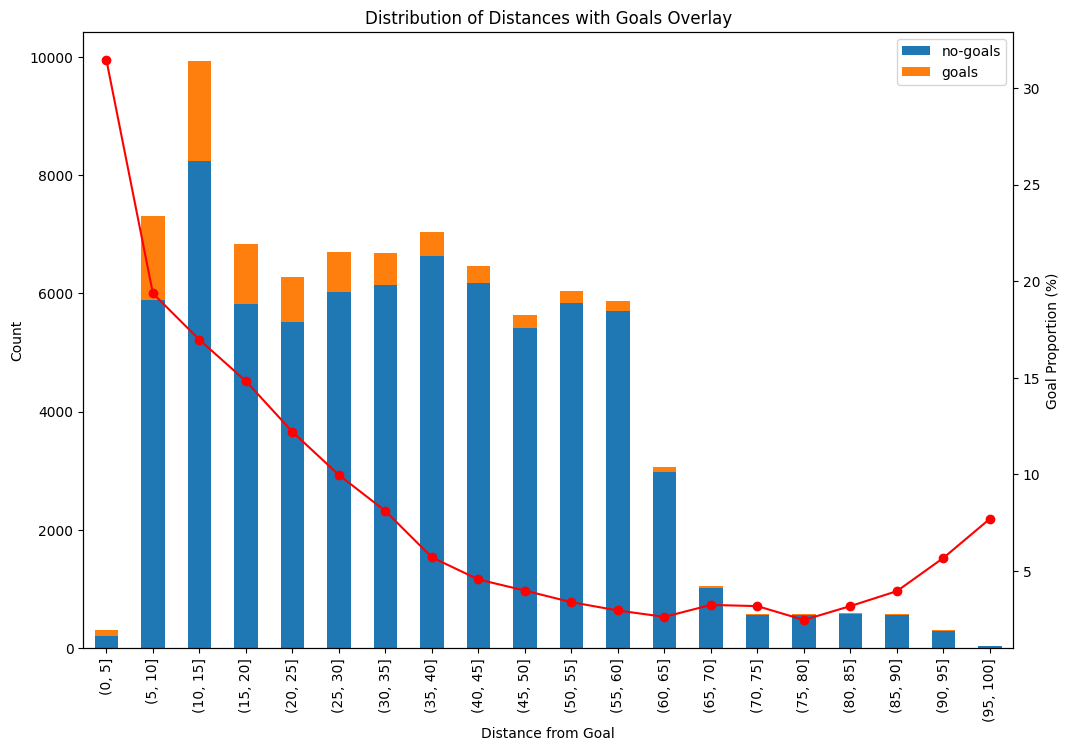

In [12]:

# Create bins for distance
df_2017 = df[df['season'] == 20172018]
bins = list(range(0, int(max(df["distance"])) + 5, 5))
distance_bins_2017_2018 = pd.cut(df_2017['distance'], bins=bins)

# Calculate the number of goals for each distance bin
goal_counts = df_2017[df_2017['type'] == 'Goal'].groupby(distance_bins_2017_2018).size()
no_goal_counts = df_2017[df_2017['type'] == 'ShotOnGoal'].groupby(distance_bins_2017_2018).size()

# Overlay the number of goals over the number of shots
shot_type_distribution = pd.DataFrame({
    'no-goals': no_goal_counts,
    'goals': goal_counts
}).fillna(0)

# Calculate the proportion of goals per shot type
shot_type_distribution['goal_proportion'] = shot_type_distribution['goals'] / ( shot_type_distribution['no-goals'] + shot_type_distribution['goals'])

# Plot the distribution of no-goals and goals
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the bar chart for no-goals and goals
shot_type_distribution[['no-goals', 'goals']].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Distribution of Distances with Goals Overlay')
ax1.set_xlabel('Distance from Goal')
ax1.set_ylabel('Count')

# Secondary y-axis for the goal proportion
ax2 = ax1.twinx()
shot_type_distribution['goal_proportion'] *= 100 
shot_type_distribution['goal_proportion'].plot(kind='line', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Goal Proportion (%)')


plt.show()

C:\Users\dre\AppData\Local\Temp\ipykernel_18916\3688145499.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_counts_2020_2021 = df_2020_2021[df_2020_2021['type'] == 'Goal'].groupby(distance_bins_2020_2021).size()
C:\Users\dre\AppData\Local\Temp\ipykernel_18916\3688145499.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_goal_counts_2020_2021 = df_2020_2021[df_2020_2021['type'] == 'ShotOnGoal'].groupby(distance_bins_2020_2021).size()
C:\Users\dre\AppData\Local\Temp\ipykernel_18916\3688145499.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future 

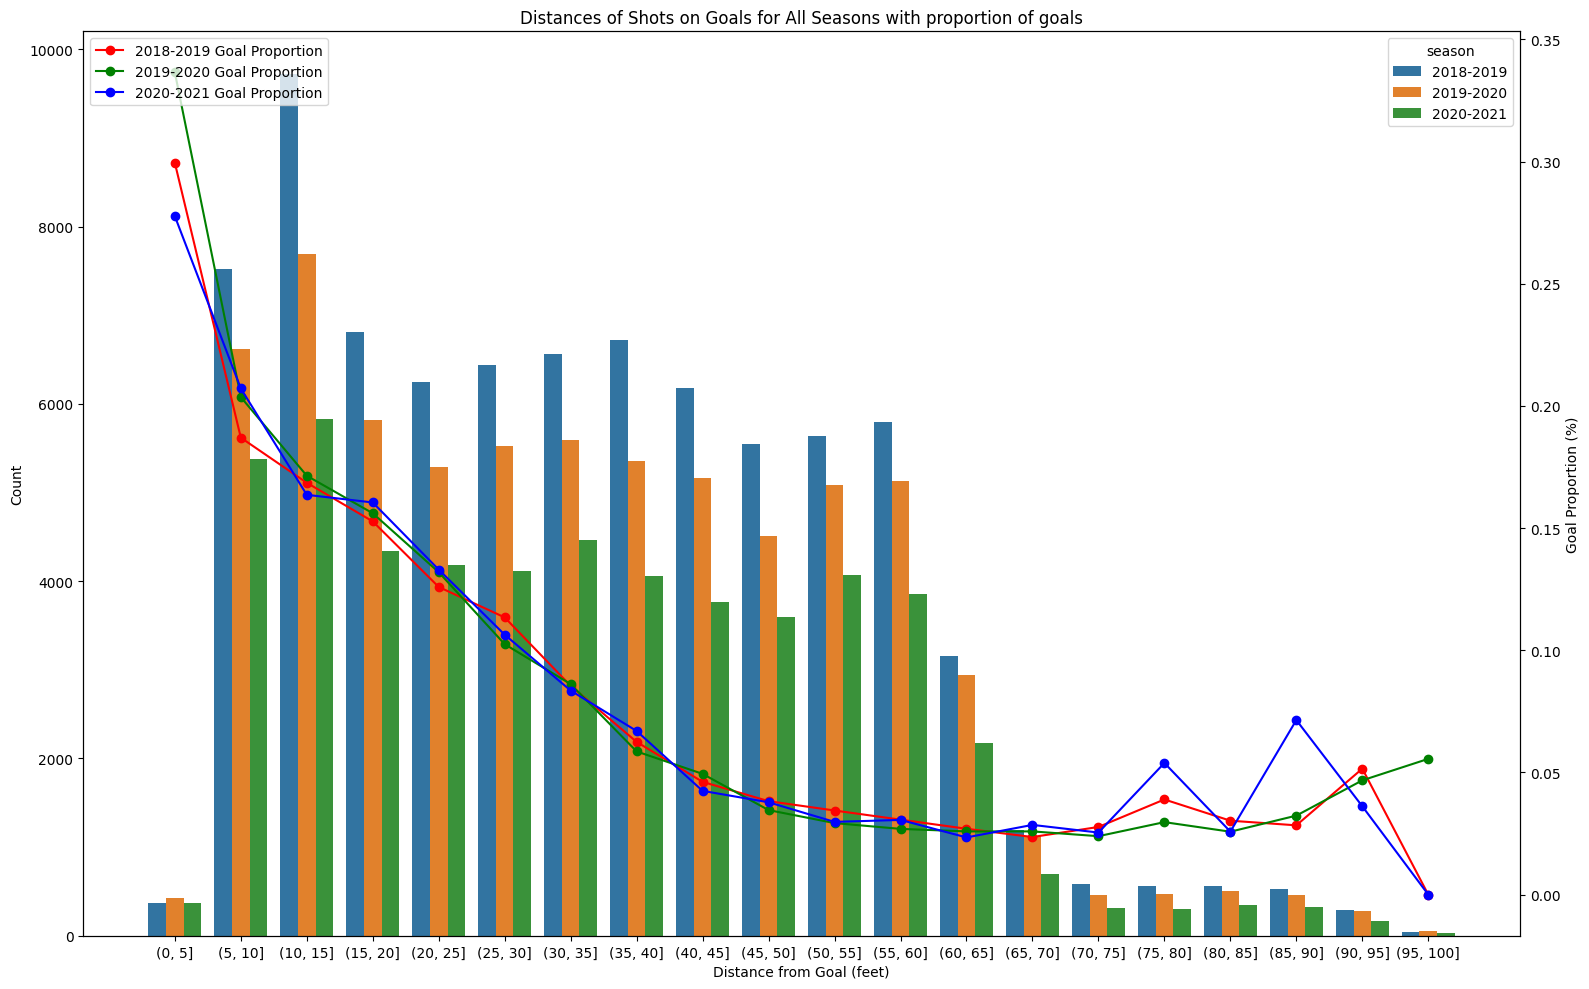

In [13]:
# Create bins for distance
df_2020_2021 = df[df['season'] == 20202021]
df_2018_2019 = df[df['season'] == 20182019]
df_2019_2020 = df[df['season'] == 20192020]

bins = list(range(0, int(max(df["distance"])) + 5, 5))
distance_bins_2020_2021 = pd.cut(df_2020_2021['distance'], bins=bins)
distance_bins_2018_2019 = pd.cut(df_2018_2019['distance'], bins=bins)
distance_bins_2019_2020 = pd.cut(df_2019_2020['distance'], bins=bins)

# Combine the data for all three seasons
df_combined = pd.concat([df_2020_2021, df_2018_2019, df_2019_2020])

# Calculate the number of goals for each distance bin for each season
goal_counts_2020_2021 = df_2020_2021[df_2020_2021['type'] == 'Goal'].groupby(distance_bins_2020_2021).size()
no_goal_counts_2020_2021 = df_2020_2021[df_2020_2021['type'] == 'ShotOnGoal'].groupby(distance_bins_2020_2021).size()

goal_counts_2018_2019 = df_2018_2019[df_2018_2019['type'] == 'Goal'].groupby(distance_bins_2018_2019).size()
no_goal_counts_2018_2019 = df_2018_2019[df_2018_2019['type'] == 'ShotOnGoal'].groupby(distance_bins_2018_2019).size()

goal_counts_2019_2020 = df_2019_2020[df_2019_2020['type'] == 'Goal'].groupby(distance_bins_2019_2020).size()
no_goal_counts_2019_2020 = df_2019_2020[df_2019_2020['type'] == 'ShotOnGoal'].groupby(distance_bins_2019_2020).size()

# Overlay the number of goals over the number of shots for each season
shot_type_distribution_2020_2021 = pd.DataFrame({
    'no-goals': no_goal_counts_2020_2021,
    'goals': goal_counts_2020_2021,
    'total_shots': no_goal_counts_2020_2021 + goal_counts_2020_2021
}).fillna(0)

shot_type_distribution_2018_2019 = pd.DataFrame({
    'no-goals': no_goal_counts_2018_2019,
    'goals': goal_counts_2018_2019,
    'total_shots': no_goal_counts_2018_2019 + goal_counts_2018_2019
}).fillna(0)

shot_type_distribution_2019_2020 = pd.DataFrame({
    'no-goals': no_goal_counts_2019_2020,
    'goals': goal_counts_2019_2020,
    'total_shots': no_goal_counts_2019_2020 + goal_counts_2019_2020
}).fillna(0)

# Calculate the proportion of goals per shot type for each season
shot_type_distribution_2018_2019['goal_proportion'] = shot_type_distribution_2018_2019['goals'] / (shot_type_distribution_2018_2019['no-goals'] + shot_type_distribution_2018_2019['goals'])
shot_type_distribution_2019_2020['goal_proportion'] = shot_type_distribution_2019_2020['goals'] / (shot_type_distribution_2019_2020['no-goals'] + shot_type_distribution_2019_2020['goals'])
shot_type_distribution_2020_2021['goal_proportion'] = shot_type_distribution_2020_2021['goals'] / (shot_type_distribution_2020_2021['no-goals'] + shot_type_distribution_2020_2021['goals'])


# Combine the data for all three seasons into one DataFrame for plotting
combined_shot_type_distribution = pd.concat([
    shot_type_distribution_2018_2019.assign(season='2018-2019'),
    shot_type_distribution_2019_2020.assign(season='2019-2020'),
    shot_type_distribution_2020_2021.assign(season='2020-2021')
])

# Plot the distribution of no-goals and goals for each season on the same plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the bar chart for no-goals and goals for each season
sns.barplot(data=combined_shot_type_distribution.reset_index(), x='distance', y='total_shots', hue='season', ax=ax1, dodge=True)


ax1.set_title('Distances of Shots on Goals for All Seasons with proportion of goals')
ax1.set_xlabel('Distance from Goal (feet)')
ax1.set_ylabel('Count')

# Create a secondary y-axis for the goal proportion for each season
ax2 = ax1.twinx()
for season, color in zip(['2018-2019', '2019-2020', '2020-2021'], ['red', 'green', 'blue']):
    season_data = combined_shot_type_distribution[combined_shot_type_distribution['season'] == season]
    season_data['goal_proportion'].plot(kind='line', color=color, marker='o', ax=ax2, label=f'{season} Goal Proportion')
fig.set_size_inches(16, 10)
ax2.set_ylabel('Goal Proportion (%)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

# figure 3.3
Let's figure out the most dangerous kinds of shots, meaning that shots that have a high probability of scoring across the most of distances.
The shots between 0 and 5 feet are quite dangerous, as we can see in fig 2. In this distance bin, the slap and the tip-in have almost 50% chance of being goals. All the other kinds of shots have high probabilty of being a goal except for the wrap around, which is a very difficult kind of shot where the player goes around the goal ans scores.
Until 50 feet, deflections remain the most dangerous shots: 20%, which is way higher than the average in fig2, especially for long distances. There's even a 10% chance of scoring between 90 and 95 feet.
Tip-ins are also pretty dangeours, as its probabilty of being a goal being almost 50% in 0-5 feet, and remaining above 10% until 40 feet.
Snap and slap shots have above 10% chance of scoring until 30 feet, whereas the wrist shots's probabilty is below 10% after 25 feet.


In [ ]:
df_2017 = df[df['season'] == 20172018]
bins = list(range(0, int(max(df_2017["distance"])) + 5, 5))
distance_bins_2017_2018 = pd.cut(df_2017['distance'], bins=bins)

goal_percentage = df_2017.groupby([distance_bins_2017_2018, 'shotType'])['is_goal'].mean().reset_index()
goal_percentage_pivot = goal_percentage.pivot(index='distance', columns='shotType', values='is_goal')

# Plot the data
plt.figure(figsize=(12, 8))
sns.heatmap(goal_percentage_pivot, annot=True, cmap='viridis', cbar_kws={'label': 'Goal Percentage'})
plt.title('Goal Percentage as a Function of Distance from Goal and Shot Type for 2017-2018 Season')
plt.xlabel('Shot Type')
plt.ylabel('Distance from Goal')
plt.show()